<a href="https://colab.research.google.com/github/Sulbae/Latihan-Membangun-Sistem-Machine-Learning/blob/main/Template_Eksperimen_MSML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import joblib
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, classification_report

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Sulbae/Eksperimen_SML_Anggun-Sulis-Setyawan/refs/heads/main/dataset_raw/water_potability_raw.csv')

df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## Deskripsi Fitur

| No | Nama | Tipe Data | Deskripsi |
|----|------|-----------|-----------|
| 1 | pH | float64 | PH merupakan parameter penting dalam mengevaluasi keseimbangan asam-basa air. PH juga merupakan indikator status air yang bersifat asam atau basa. WHO telah merekomendasikan batas pH maksimum yang diizinkan dari 6,5 hingga 8,5. Kisaran pH yang diteliti saat ini adalah 6,52–6,83 yang berada dalam kisaran standar WHO. |
| 2 | Hardness | float64 | Kesadahan terutama disebabkan oleh garam kalsium dan magnesium. Garam-garam ini terlarut dari endapan geologis yang dilalui air. Lamanya waktu air bersentuhan dengan bahan yang menghasilkan kesadahan membantu menentukan seberapa banyak kesadahan yang ada dalam air mentah. Kesadahan awalnya didefinisikan sebagai kapasitas air untuk mengendapkan sabun yang disebabkan oleh Kalsium dan Magnesium. |
| 3 | Solids (Total Dissolved Solids - TDS) | float64 | Air memiliki kemampuan untuk melarutkan berbagai macam mineral atau garam anorganik dan beberapa mineral atau garam organik seperti kalium, kalsium, natrium, bikarbonat, klorida, magnesium, sulfat, dll. Mineral-mineral ini menghasilkan rasa yang tidak diinginkan dan warna yang encer pada air. Ini adalah parameter penting untuk penggunaan air. Air dengan nilai TDS yang tinggi menunjukkan bahwa air tersebut sangat bermineral. Batas yang diinginkan untuk TDS adalah 500 mg/l dan batas maksimum adalah 1000 mg/l yang ditentukan untuk tujuan minum. |
| 4 | Chloramines | float64 | Klorin dan kloramina merupakan disinfektan utama yang digunakan dalam sistem air publik. Kloramina paling sering terbentuk ketika amonia ditambahkan ke klorin untuk mengolah air minum. Kadar klorin hingga 4 miligram per liter (mg/L atau 4 bagian per juta (ppm)) dianggap aman dalam air minum. |
| 5 | Sulfate | float64 | Sulfat adalah zat alami yang ditemukan dalam mineral, tanah, dan bebatuan. Zat ini terdapat di udara sekitar, air tanah, tanaman, dan makanan. Penggunaan utama sulfat secara komersial adalah dalam industri kimia. Konsentrasi sulfat dalam air laut sekitar 2.700 miligram per liter (mg/L). Konsentrasinya berkisar antara 3 hingga 30 mg/L dalam sebagian besar persediaan air tawar, meskipun konsentrasi yang jauh lebih tinggi (1000 mg/L) ditemukan di beberapa lokasi geografis. |
| 6 | Conductivity | float64 | Air murni bukanlah konduktor arus listrik yang baik, melainkan isolator yang baik. Peningkatan konsentrasi ion meningkatkan konduktivitas listrik air. Secara umum, jumlah padatan terlarut dalam air menentukan konduktivitas listrik. Konduktivitas listrik (EC) sebenarnya mengukur proses ionik suatu larutan yang memungkinkannya mengalirkan arus. Menurut standar WHO, nilai EC tidak boleh melebihi 400 μS/cm. |
| 7 | Organic Carbon | float64 | Total Organic Carbon (TOC) di sumber air berasal dari bahan organik alami (NOM) yang membusuk serta sumber sintetis. TOC adalah ukuran jumlah total karbon dalam senyawa organik dalam air murni. Menurut US EPA < 2 mg/L sebagai TOC dalam air olahan/air minum, dan < 4 mg/Lit dalam sumber air yang digunakan untuk pengolahan. |
| 8 | Trihalomethanes | float64 | THM adalah zat kimia yang dapat ditemukan dalam air yang diolah dengan klorin. Konsentrasi THM dalam air minum bervariasi menurut tingkat bahan organik dalam air, jumlah klorin yang dibutuhkan untuk mengolah air, dan suhu air yang diolah. Kadar THM hingga 80 ppm dianggap aman dalam air minum. |
| 9 | Turbidity | float64 | Kekeruhan air bergantung pada kuantitas zat padat yang ada dalam keadaan tersuspensi. Kekeruhan merupakan ukuran sifat air yang memancarkan cahaya dan pengujian ini digunakan untuk menunjukkan kualitas pembuangan limbah terhadap zat koloid. Nilai kekeruhan rata-rata yang diperoleh untuk Kampus Wondo Genet (0,98 NTU) lebih rendah dari nilai yang direkomendasikan WHO yaitu 5,00 NTU. |
| 10 | Potability | int64 | Menunjukkan apakah air aman untuk dikonsumsi manusia, di mana 1 berarti Layak Minum dan 0 berarti Tidak Layak Minum. |

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Cek Statistik Data Awal

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


## Data Assesment

### Cek Missing Value

In [5]:
missing_values = df.isnull().sum().sum()

if missing_values > 0:
    print("Missing Values:\n", df.isnull().sum())
else:
    print("Tidak ada Missing Values")

Missing Values:
 ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


### Cek Duplikasi Data

In [6]:
duplikasi = df.duplicated().sum()

if duplikasi > 0:
    print(f"Terdapat {duplikasi} duplikasi data")
else:
    print("Tidak ada duplikasi data")

Tidak ada duplikasi data


## Eksplorasi

### Cek Outlier

In [7]:
def boxplot_outlier(df):
    view_outlier = plt.figure(figsize=(20,15))
    axes = []
    for k, cols in enumerate(df):
        ax = plt.subplot(4, 3, k+1)
        sns.boxplot(x=cols, data=df, color="#264D58", ax=ax)
        ax.set_title(f"Check Outliers - {cols}", fontsize=12)
        axes.append(ax)
    plt.tight_layout(pad=3.0)
    return view_outlier, axes

(<Figure size 2000x1500 with 10 Axes>,
 [<Axes: title={'center': 'Check Outliers - ph'}, xlabel='ph'>,
  <Axes: title={'center': 'Check Outliers - Hardness'}, xlabel='Hardness'>,
  <Axes: title={'center': 'Check Outliers - Solids'}, xlabel='Solids'>,
  <Axes: title={'center': 'Check Outliers - Chloramines'}, xlabel='Chloramines'>,
  <Axes: title={'center': 'Check Outliers - Sulfate'}, xlabel='Sulfate'>,
  <Axes: title={'center': 'Check Outliers - Conductivity'}, xlabel='Conductivity'>,
  <Axes: title={'center': 'Check Outliers - Organic_carbon'}, xlabel='Organic_carbon'>,
  <Axes: title={'center': 'Check Outliers - Trihalomethanes'}, xlabel='Trihalomethanes'>,
  <Axes: title={'center': 'Check Outliers - Turbidity'}, xlabel='Turbidity'>,
  <Axes: title={'center': 'Check Outliers - Potability'}, xlabel='Potability'>])

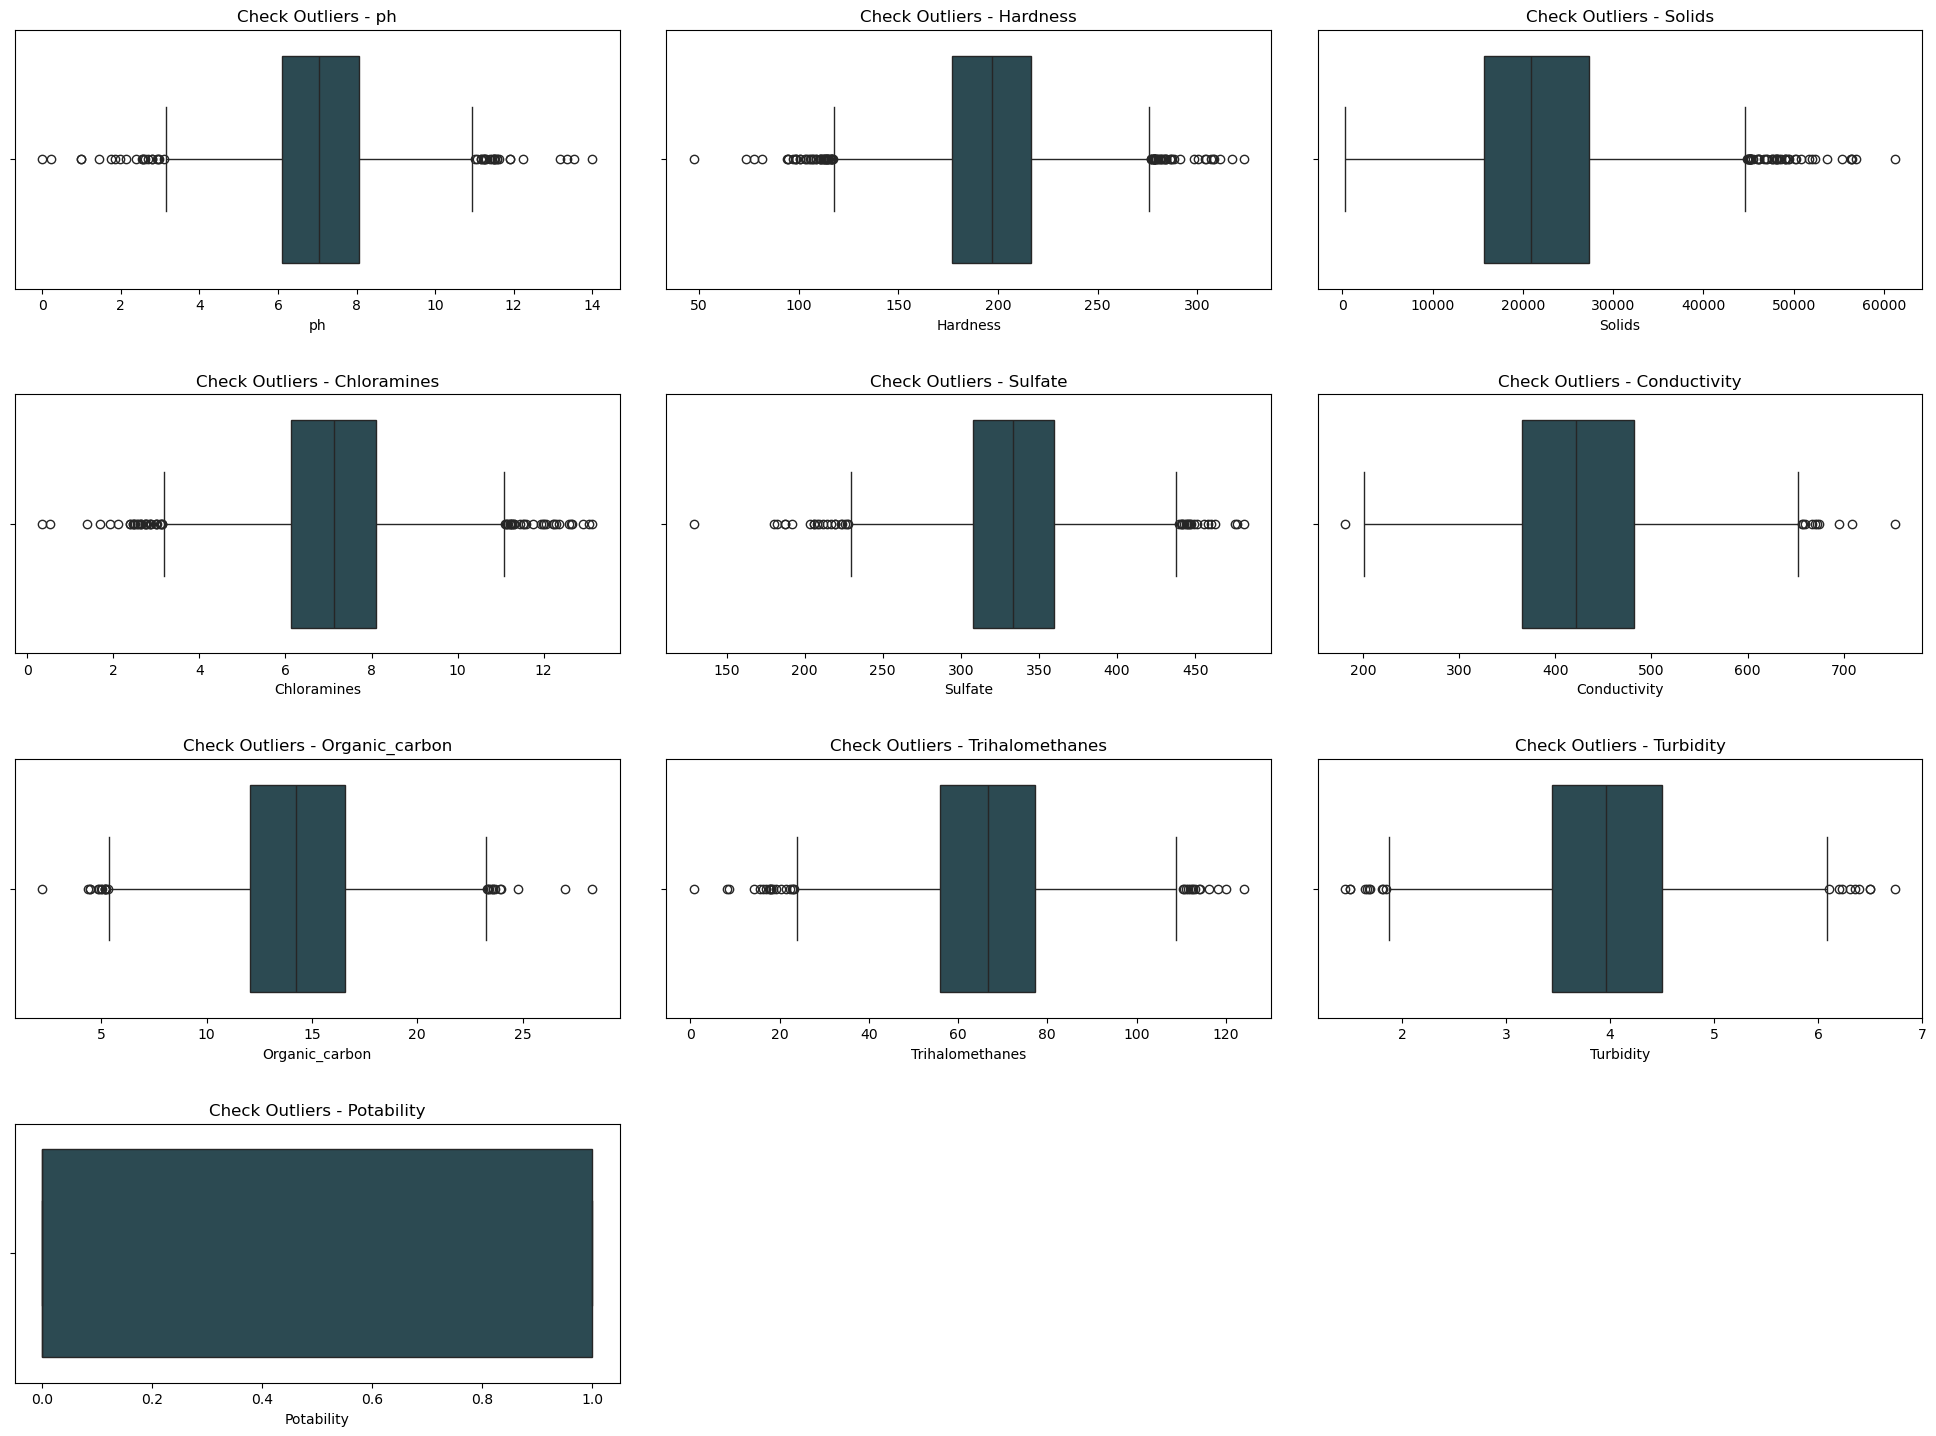

In [8]:
boxplot_outlier(df)

### Cek Distribusi

In [9]:
def hisplot(df):
    view_distribution = plt.figure(figsize=(20,15))
    axes = []
    for k, cols in enumerate(df):
        ax = plt.subplot(4, 3, k+1)
        sns.histplot(x=cols, data=df, color="#264D58", kde=True, ax=ax)
        ax.set_title(f"Check Distribution - {cols}", fontsize=12)
        axes.append(ax)
    plt.tight_layout(pad=3.0)
    return view_distribution, axes

(<Figure size 2000x1500 with 10 Axes>,
 [<Axes: title={'center': 'Check Distribution - ph'}, xlabel='ph', ylabel='Count'>,
  <Axes: title={'center': 'Check Distribution - Hardness'}, xlabel='Hardness', ylabel='Count'>,
  <Axes: title={'center': 'Check Distribution - Solids'}, xlabel='Solids', ylabel='Count'>,
  <Axes: title={'center': 'Check Distribution - Chloramines'}, xlabel='Chloramines', ylabel='Count'>,
  <Axes: title={'center': 'Check Distribution - Sulfate'}, xlabel='Sulfate', ylabel='Count'>,
  <Axes: title={'center': 'Check Distribution - Conductivity'}, xlabel='Conductivity', ylabel='Count'>,
  <Axes: title={'center': 'Check Distribution - Organic_carbon'}, xlabel='Organic_carbon', ylabel='Count'>,
  <Axes: title={'center': 'Check Distribution - Trihalomethanes'}, xlabel='Trihalomethanes', ylabel='Count'>,
  <Axes: title={'center': 'Check Distribution - Turbidity'}, xlabel='Turbidity', ylabel='Count'>,
  <Axes: title={'center': 'Check Distribution - Potability'}, xlabel='Pot

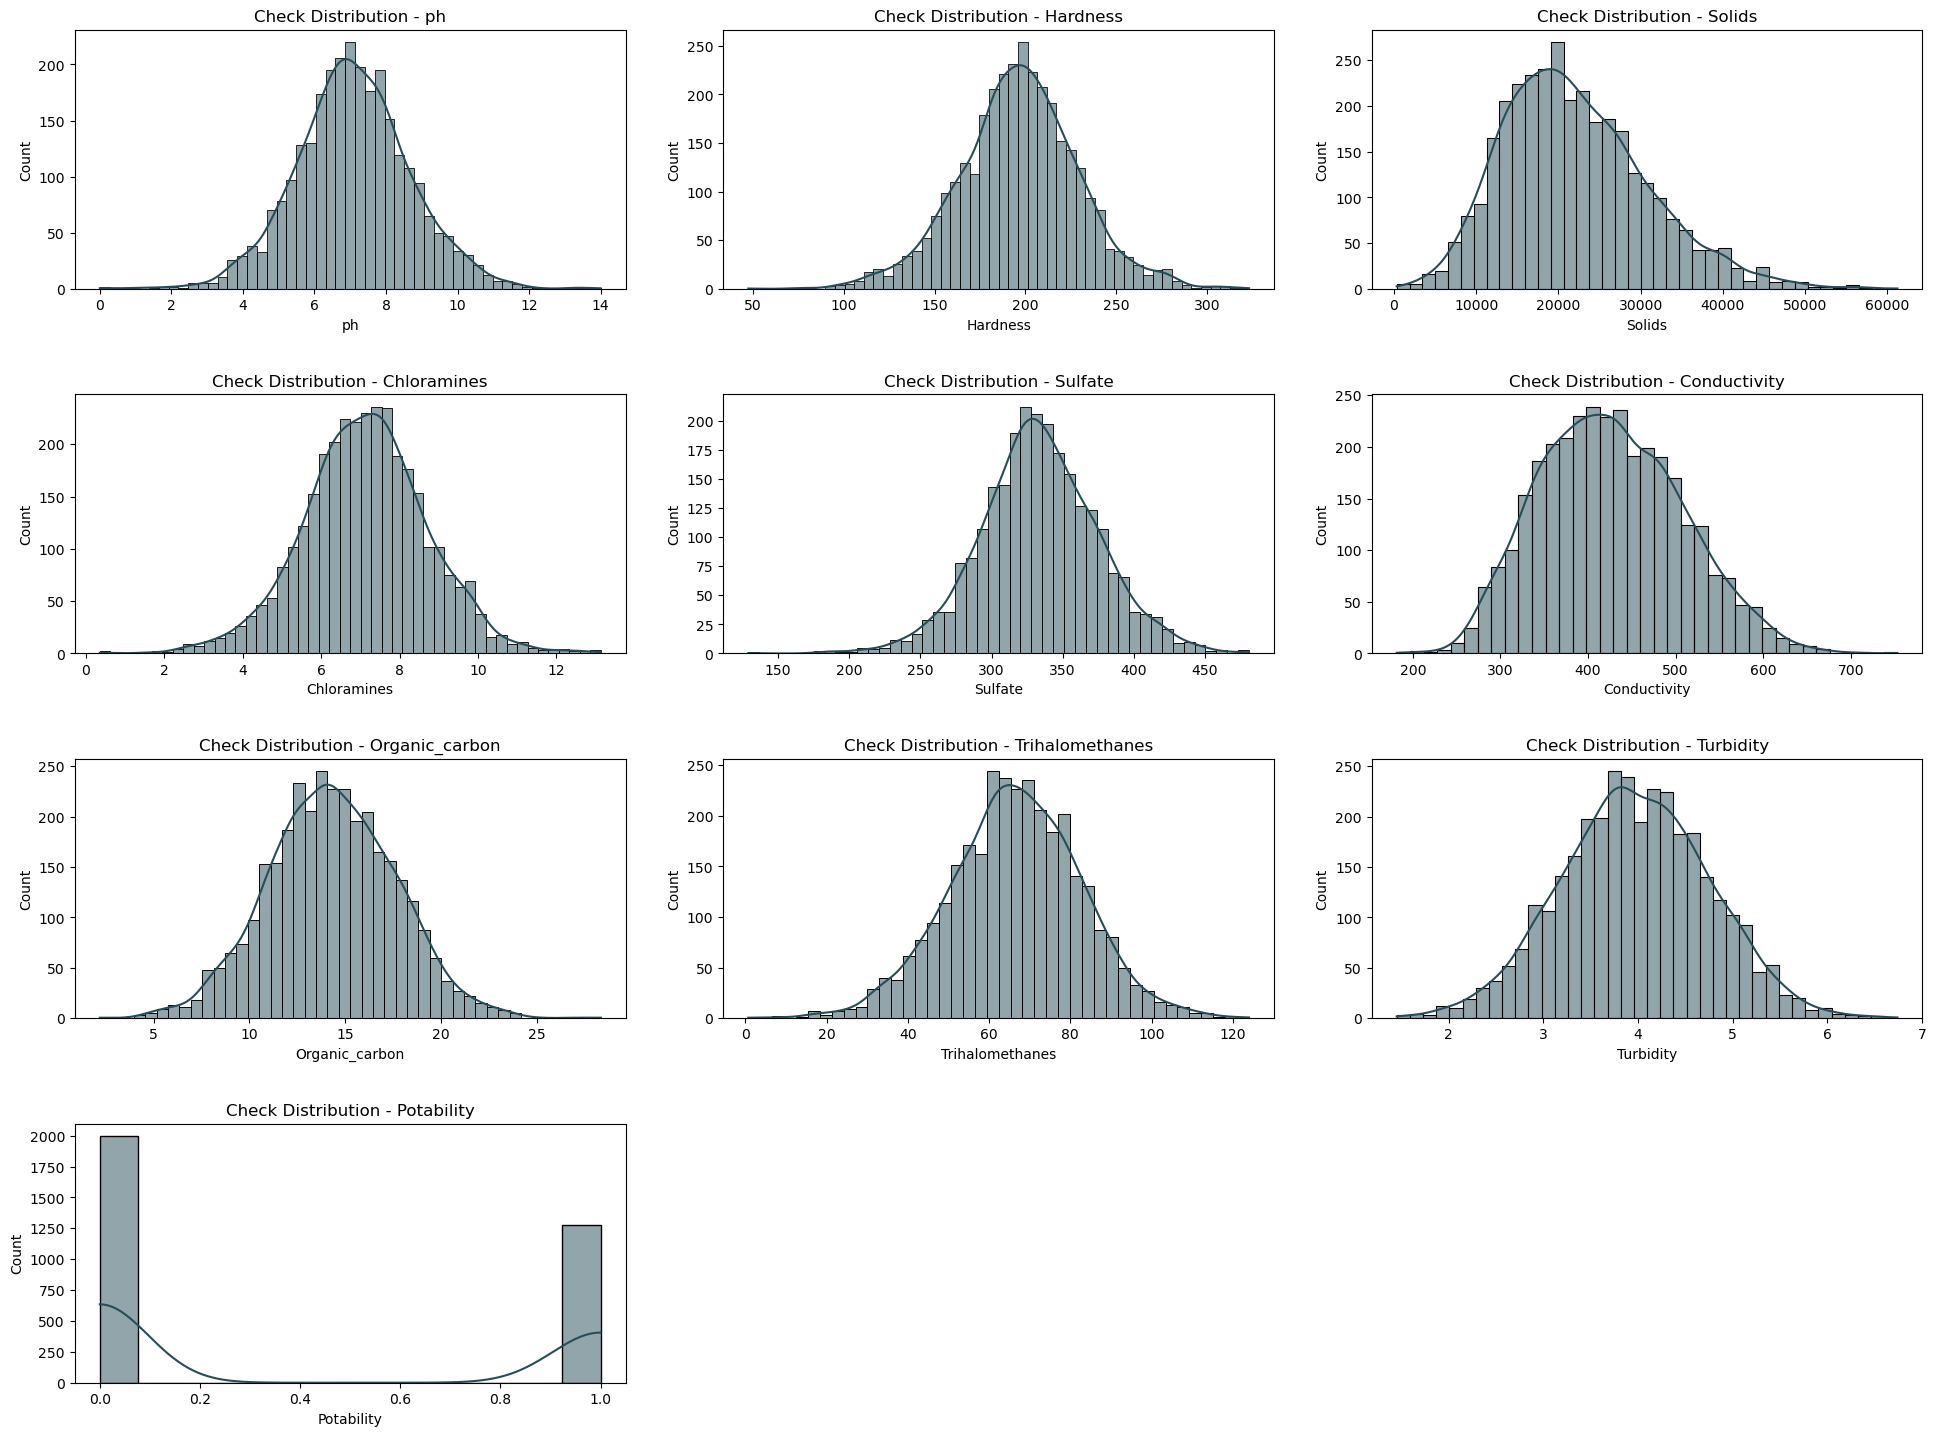

In [10]:
hisplot(df)

### Cek Korelasi

In [11]:
def heatmap_corr(df):
    corr, ax = plt.subplots(figsize=(10, 6))
    sns.heatmap(df.corr(numeric_only=True), annot=True, ax=ax)
    ax.set_title('Correlation Metrics', fontsize=12)
    return corr, ax

(<Figure size 1000x600 with 2 Axes>,
 <Axes: title={'center': 'Correlation Metrics'}>)

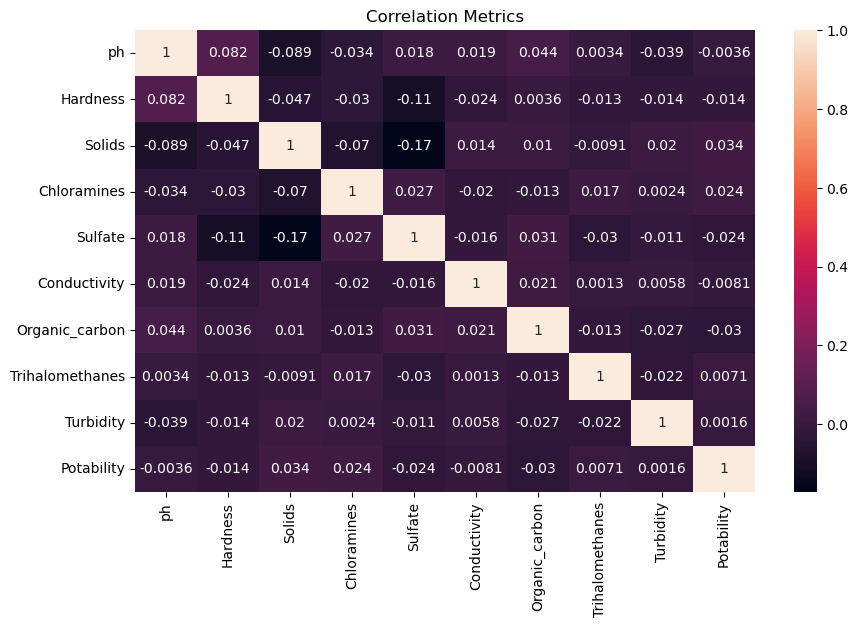

In [12]:
heatmap_corr(df)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## Missing Values Handling

In [13]:
miss_col = ["ph", "Sulfate", "Trihalomethanes"]

for col in miss_col:
    df[col].fillna(value=df[col].median(), inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_59256\512476969.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(value=df[col].median(), inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_59256\512476969.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [14]:
if df.isnull().sum().sum() > 0:
    print("Missing Values:\n", df.isnull().sum())
else:
    print("Tidak ada Missing Values") 

Tidak ada Missing Values


## Standarisasi

In [15]:
X = df.drop(columns=['Potability'])
y = df['Potability']

In [16]:
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

df_scaled = pd.concat([X_scaled, y], axis=1)

df_scaled.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-0.025474,0.259195,-0.139471,0.112415,0.965957,1.708954,-1.180651,1.305434,-1.286298,0
1,-2.284717,-2.036414,-0.385987,-0.307694,-0.014799,2.062575,0.270597,-0.639186,0.684218,0
2,0.697319,0.847665,-0.240047,1.360594,-0.014799,-0.094032,0.781117,0.000800,-1.167365,0
3,0.845393,0.547651,0.000493,0.592008,0.644130,-0.778830,1.255134,2.152154,0.848412,0
4,1.372982,-0.464429,-0.460249,-0.363698,-0.649522,-0.343939,-0.824357,-2.182297,0.138786,0


## Export Preprocessed Data

In [17]:
df_scaled.to_csv('water_potability_preprocessing.csv', index=False)